# EE 5907  Pattern Recognition - CA2
# Face Recognition Programming Project

### Name: ZhouYing  
### Student ID: A0229575R

#### NOTE:

1. There are 5 parts of the programming project. It will take some minutes to run the whole project.

2. Since the training and testing set are same for all 5 parts, I didn't separate them for convenient.

3. You are kindly to change the dataset path after you downloaded them to your computer:)

#### The project inclues 5 classification ways: 
1. PCA for feature extraction and nearset neighbor for calssfication.
2. LDA for feature extraction and nearset neighbor for classfication.
3. GMM for clustering.	
4. SVM for classfication.
5. CNN for calssfication

## 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import os
from sklearn.decomposition import PCA

import matplotlib.colors as mcolors

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

## 1.1 Samples
#### Firstly, choose one picture and get the size of it.

In [2]:
sample = cv2.imread('/Users/zhouying/Downloads/PIE/1/63.jpg',cv2.IMREAD_GRAYSCALE)

In [3]:
sample

array([[16, 23, 32, ..., 21, 36, 68],
       [13, 20, 28, ..., 41, 47, 63],
       [16, 21, 26, ..., 63, 71, 76],
       ...,
       [16, 12,  7, ...,  8, 14,  9],
       [18,  9,  4, ...,  7, 16, 15],
       [19,  6,  0, ..., 16, 22, 16]], dtype=uint8)

## 1.2 Selfie Images Data 

### 1.2.1 Selfie Images Data Load

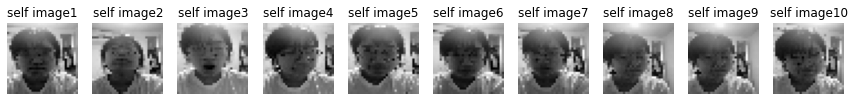

In [4]:
self_imgs= []
self_labels = []

for i in range(10):
    
    # the data set path need to change as your save path after you download the files!!!
    img = cv2.imread('/Users/zhouying/Downloads/self_imgs/'+ str(i+1)+'.jpg', cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_CUBIC)
    self_imgs.append(img)
    self_labels.append(26)  # label the data as 'class 26'

train_self_imgs = self_imgs[0:7]   # select 70% as the training data
test_self_imgs = self_imgs[7:10]
train_self_labels = self_labels[0:7]  
test_self_labels = self_labels[7:10]

fig = plt.figure(figsize = (15,9))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(self_imgs[i], cmap = 'gray' )
    plt.title('self image'+ str(i+1))
    plt.axis('off')
    
plt.show()

### 1.2.2 Selfie Images Data Spilt

In [5]:
i = 1
train_self_set = pd.DataFrame()
test_self_set = pd.DataFrame()

for img in train_self_imgs:
    
    d = img.shape[0]*img.shape[1]
    img_v = img.copy()
    img_v = pd.DataFrame(img.reshape(d,-1), columns = ['self'+ str(i)])
    train_self_set = pd.concat([train_self_set, img_v],axis = 1)
    i += 1
    
train_self_set = train_self_set.T

            
for img in test_self_imgs:

    d = img.shape[0]*img.shape[1]
    img_v = img.copy()
    img_v = pd.DataFrame(img.reshape(d,-1), columns = ['self'+ str(i)])
    test_self_set = pd.concat([test_self_set,img_v],axis = 1)
    i += 1
    
test_self_set = test_self_set.T

## 1.3 Trainning and Testing data of CMU PIE

In [6]:
tr_rate = 0.7 # set the training set rate as 70%

def spilt_set(file_list):
    num = len(file_list)
    train_num = int(num * tr_rate) + 1
    train_list = random.sample(file_list, train_num)  # get images from image_list in the proportion of 70%.
    test_list = list(set(file_list) - set(train_list))
    
    return train_list, test_list

In [7]:
def read_directory(directory_name):
    namelist = []
    for filename in os.listdir(directory_name):
        namelist.append(filename)
    return namelist

In [8]:
def get_dataset(name_list):
    
    train_data_set = pd.DataFrame()
    test_data_set = pd.DataFrame()
    ytr_label = []
    yte_label = []
    for i in name_list:  
        
        # the data set path need to change as your save path after you download the files!!!
        img_list = read_directory("/Users/zhouying/Downloads/PIE/" +str(i))  
        train_list, test_list = spilt_set(img_list)
        
        for name in train_list:

            img_data = cv2.imread('/Users/zhouying/Downloads/PIE/'+str(i)+ '/'+ str(name),cv2.IMREAD_GRAYSCALE)
            d = img_data.shape[0]*img_data.shape[1]
            img_vect = img_data.copy()
            img_vect = pd.DataFrame(img_data.reshape(d,-1), columns = [str(i)])
            ytr_label.append(i)
            train_data_set = pd.concat([train_data_set,img_vect],axis = 1)
            
        for name in test_list:

            img_data = cv2.imread('/Users/zhouying/Downloads/PIE/'+str(i)+ '/'+ str(name),cv2.IMREAD_GRAYSCALE)
            d = img_data.shape[0]*img_data.shape[1]
            img_vect = img_data.copy()
            img_vect = pd.DataFrame(img_data.reshape(d,-1), columns = [str(i)])
            yte_label.append(i)
            test_data_set = pd.concat([test_data_set,img_vect],axis = 1)
    
    train_data_set = train_data_set.T
    test_data_set = test_data_set.T
    
    
    return train_data_set, ytr_label, test_data_set, yte_label


In [9]:
file_list = list(np.arange(1,26)) # choose 25 of the files
train_pie_set,train_pie_label,test_pie_set, test_pie_label = get_dataset(file_list)

In [10]:
train_pie_set  # show the dataframe of PIE training set

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
1,51,47,43,41,41,41,38,36,21,24,...,50,59,53,57,48,23,7,8,13,13
1,56,99,114,121,124,124,122,92,116,115,...,109,81,59,15,0,9,8,6,9,5
1,124,60,16,32,40,38,49,34,31,33,...,58,57,60,55,49,45,43,41,37,34
1,8,12,17,22,26,28,27,27,27,41,...,114,104,98,92,83,76,56,18,4,20
1,5,24,23,12,22,36,41,42,32,34,...,50,44,43,42,38,37,46,59,64,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,86,83,84,27,20,29,54,65,86,121,...,129,122,152,158,160,151,141,137,137,137
25,11,11,11,12,12,13,13,13,31,15,...,69,68,76,78,43,30,23,52,167,252
25,22,13,14,22,23,22,35,56,63,59,...,121,18,90,248,244,255,247,255,236,235
25,56,66,59,35,27,48,71,79,116,106,...,118,116,132,132,139,140,60,98,254,247


In [11]:
print('Number of train PIE images:', len(train_pie_set))
print('Number of test PIE images:', len(test_pie_set))
print('Number of train self images:', len(train_self_set))
print('Number of test self images:', len(test_self_set))

Number of train PIE images: 2975
Number of test PIE images: 1275
Number of train self images: 7
Number of test self images: 3


## 1. Principal Component Analysis (PCA)

### 1.1 Slecte Samples

In [12]:
from matplotlib import cm

In [13]:
# Sample 500 data points
select_id = np.sort(random.sample(range(len(train_pie_set)), 500))
select_train_pie_set = train_pie_set.values[select_id,:]
select_train_set = np.concatenate((select_train_pie_set,train_self_set), axis = 0)
select_train_pie_label = np.array(train_pie_label.copy()).reshape(-1,1)[select_id]
select_train_label =  np.concatenate((select_train_pie_label,np.array(train_self_labels).reshape(-1,1)), axis = 0)

In [14]:
select_train_set.shape

(507, 1024)

In [15]:
select_train_label.shape

(507, 1)

### 1.2  Plot  2D figure

In [16]:
pca = PCA(n_components=2)   # set the components of PCA.i.e. dimension of the data after PCA.
data_pca = pca.fit(select_train_set).transform(select_train_set)

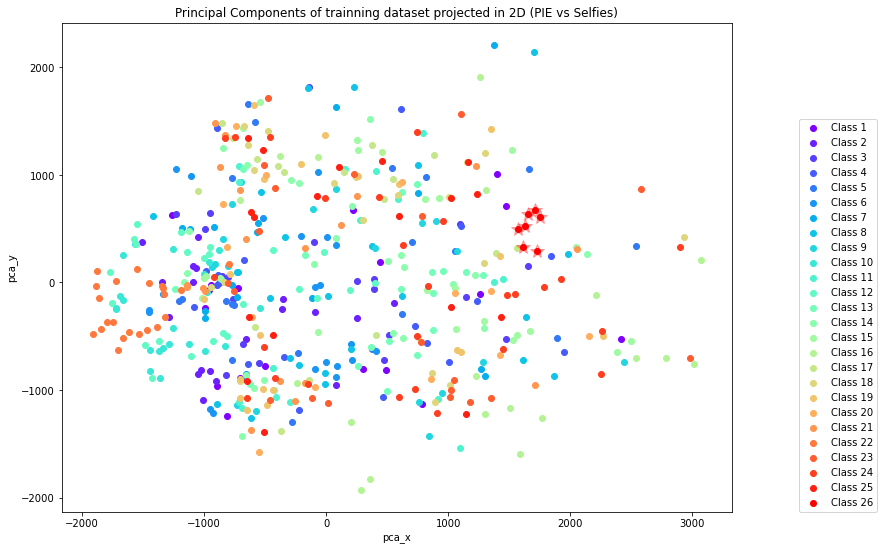

In [17]:
trainset_2d = np.concatenate((data_pca,select_train_label), axis = 1)
trainset_2d = pd.DataFrame(trainset_2d, columns = ['pca_x', 'pca_y','label'])

fig = plt.figure(figsize=(12,9))
y_unique = np.unique(select_train_label)
colors = cm.rainbow(np.linspace(0.0, 1.0, len(y_unique)))
for label, color in zip(y_unique, colors):
    X = trainset_2d[trainset_2d.label.isin ([label])]
    plt.scatter(X.pca_x,X.pca_y, c = color[np.newaxis, :], label="Class %s" % label,)


X_self = trainset_2d[trainset_2d.label.isin([26])]
plt.plot(X_self.pca_x, X_self.pca_y, 'r*',alpha = 0.3 ,markersize=15)

plt.legend(loc = [1.1,0])
plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.title('Principal Components of trainning dataset projected in 2D (PIE vs Selfies)')

plt.show()

### 1.3  Plot 3D figure

In [18]:
pca = PCA(n_components=3)
data_pca_3d = pca.fit(select_train_set).transform(select_train_set)

In [19]:
trainset_3d = np.concatenate((data_pca_3d, select_train_label), axis = 1)
trainset_3d = pd.DataFrame(trainset_3d, columns = ['pca_x', 'pca_y','pca_z','label'])

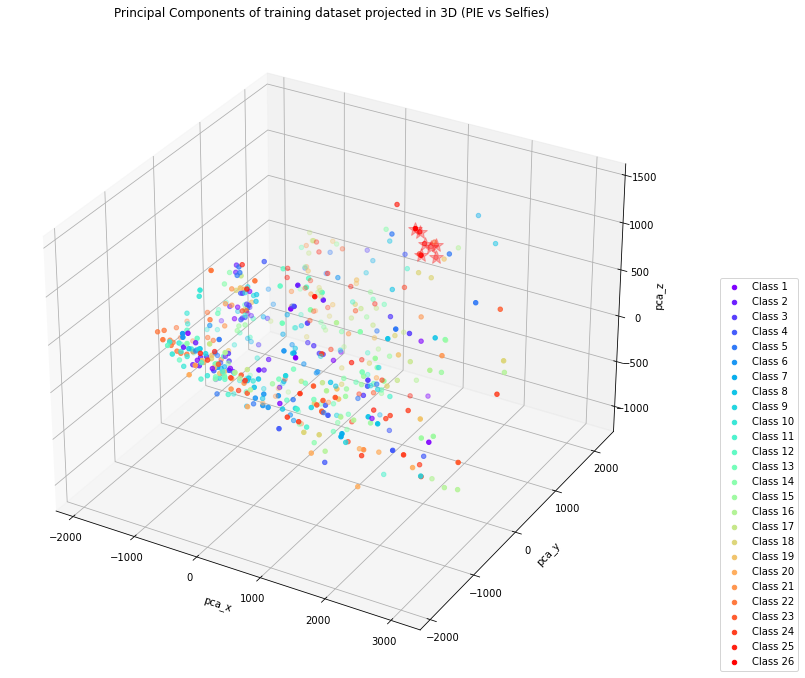

In [20]:
fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig)
y_unique = np.unique(select_train_label)
colors = cm.rainbow(np.linspace(0.0, 1.0, len(y_unique)))
for label, color in zip(y_unique, colors):
    X = trainset_3d[trainset_3d.label.isin ([label])]
    ax.scatter(X.pca_x,X.pca_y,X.pca_z, c = color[np.newaxis, :], label="Class %s" % label,)

X_self_3d = trainset_3d[trainset_3d.label.isin([26])]
plt.plot(X_self_3d.pca_x, X_self_3d.pca_y,X_self_3d.pca_z, 'r*',alpha = 0.3 ,markersize=15)

ax.legend(loc = [1.1,0])
ax.set_xlabel('pca_x')
ax.set_ylabel('pca_y')
ax.set_zlabel('pca_z')
plt.title('Principal Components of training dataset projected in 3D (PIE vs Selfies)')

plt.show()

### 1.4   Eigenfaces of the 3D PCA model


In [21]:
eigenfaces = pca.components_.reshape(3, 32, 32)

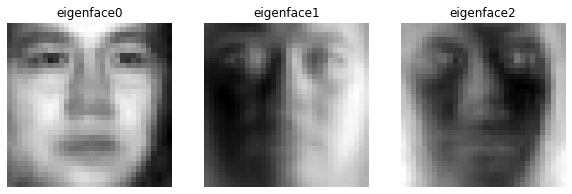

In [22]:
plt.figure(figsize=(10,8))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(eigenfaces[i, :, :], cmap = 'gray') # get three eigenfaces 
    plt.title('eigenface'+ str(i))
    plt.axis('off')


### 1.5 Classification 

Apply PCA to reduce dimensionality of face images to 40, 80 and 200 respectively. Classifying the test images using the rule of KNN

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
def PCA_Classfication(train_data,train_label, test_data, test_label, dimension):
    
    pca = PCA(n_components = dimension)
    
    train_data_pca = pca.fit(train_data).transform(train_data)
    
    clf = KNeighborsClassifier()
    clf.fit(train_data_pca,train_label)
    
    test_data_pca = pca.transform(test_data)
    ytest_pred = clf.predict(test_data_pca)
    acuracy = accuracy_score(test_label,ytest_pred)
    
    return acuracy

In [25]:
train_set = np.concatenate((train_pie_set,train_self_set), axis = 0)
train_label  =  np.concatenate((train_pie_label,train_self_labels), axis = 0)

In [26]:
acc1_pie = PCA_Classfication(train_set,train_label, test_pie_set, test_pie_label, 40)
acc2_pie = PCA_Classfication(train_set,train_label, test_pie_set, test_pie_label, 80)
acc3_pie = PCA_Classfication(train_set,train_label, test_pie_set, test_pie_label, 200)

In [27]:
acc1_self = PCA_Classfication(train_set,train_label, test_self_set, test_self_labels, 40)
acc2_self = PCA_Classfication(train_set,train_label, test_self_set, test_self_labels, 80)
acc3_self = PCA_Classfication(train_set,train_label, test_self_set, test_self_labels, 200)

In [28]:
print('The accuracy of PCA with 40 components plus 1-NN classification on the CMU PIE test images is:', acc1_pie) 
print('The accuracy of PCA with 80 components plus 1-NN classification on the CMU PIE test images is:', acc2_pie) 
print('The accuracy of PCA with 200 components plus 1-NN classification on the CMU PIE test images is:', acc3_pie) 


The accuracy of PCA with 40 components plus 1-NN classification on the CMU PIE test images is: 0.7803921568627451
The accuracy of PCA with 80 components plus 1-NN classification on the CMU PIE test images is: 0.8219607843137255
The accuracy of PCA with 200 components plus 1-NN classification on the CMU PIE test images is: 0.8454901960784313


In [29]:

print('The accuracy of PCA with 40 components plus 1-NN classification on the self test images is:', acc1_self) 
print('The accuracy of PCA with 80 components plus 1-NN classification on the self test images is:', acc2_self) 
print('The accuracy of PCA with 200 components plus 1-NN classification on the self test images is:', acc3_self ) 

The accuracy of PCA with 40 components plus 1-NN classification on the self test images is: 1.0
The accuracy of PCA with 80 components plus 1-NN classification on the self test images is: 1.0
The accuracy of PCA with 200 components plus 1-NN classification on the self test images is: 1.0


## 2.  Linear Discriminant Analysis(LDA)

### 2.1 Plot 2D figure

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
lda = LinearDiscriminantAnalysis(n_components = 2)
trainset_lda = lda.fit(train_set, train_label).transform(train_set)

In [32]:
trainset_lda_2d = np.concatenate((trainset_lda,train_label.reshape(-1,1)), axis = 1)
trainset_lda_2d = pd.DataFrame(trainset_lda_2d, columns = ['lda_x', 'lda_y','label'])

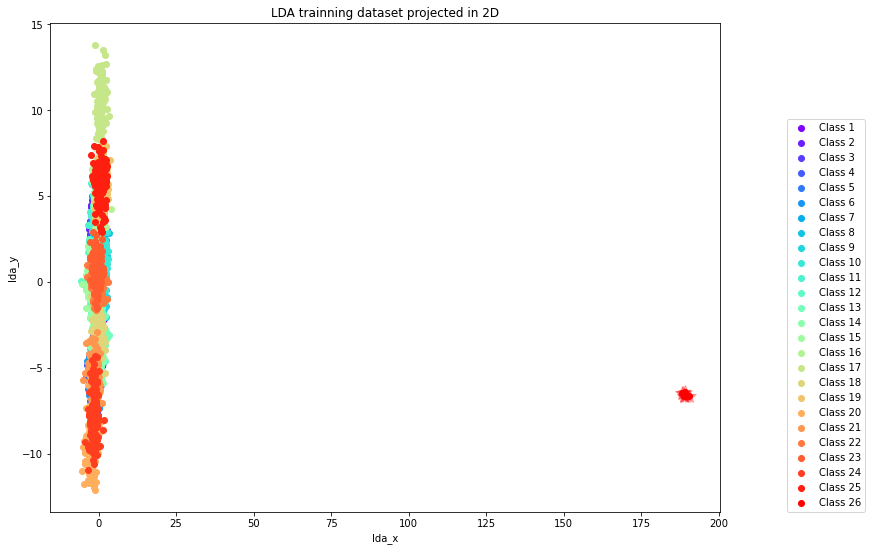

In [33]:
fig = plt.figure(figsize=(12,9))
y_unique = np.unique(train_label)
colors = cm.rainbow(np.linspace(0.0, 1.0, len(y_unique)))
for label, color in zip(y_unique, colors): 
    X = trainset_lda_2d[trainset_lda_2d.label.isin ([label])]
    plt.scatter(X.lda_x,X.lda_y, c = color[np.newaxis, :], label="Class %s" % label)

X_self_lda = trainset_lda_2d[trainset_lda_2d.label.isin([26])]
plt.plot(X_self_lda.lda_x, X_self_lda.lda_y, 'r*',alpha = 0.3 ,markersize=15) # highlight the selfie images data.

plt.legend(loc = [1.1,0])
plt.xlabel('lda_x')
plt.ylabel('lda_y')
plt.title('LDA trainning dataset projected in 2D')

plt.show()

### 2.2 Plot 3D figure

In [34]:
lda = LinearDiscriminantAnalysis(n_components = 3)
trainset_lda = lda.fit(train_set, train_label).transform(train_set)
trainset_lda_3d = np.concatenate((trainset_lda,train_label.reshape(-1,1)), axis = 1)
trainset_lda_3d = pd.DataFrame(trainset_lda_3d, columns = ['lda_x', 'lda_y','lda_z','label'])

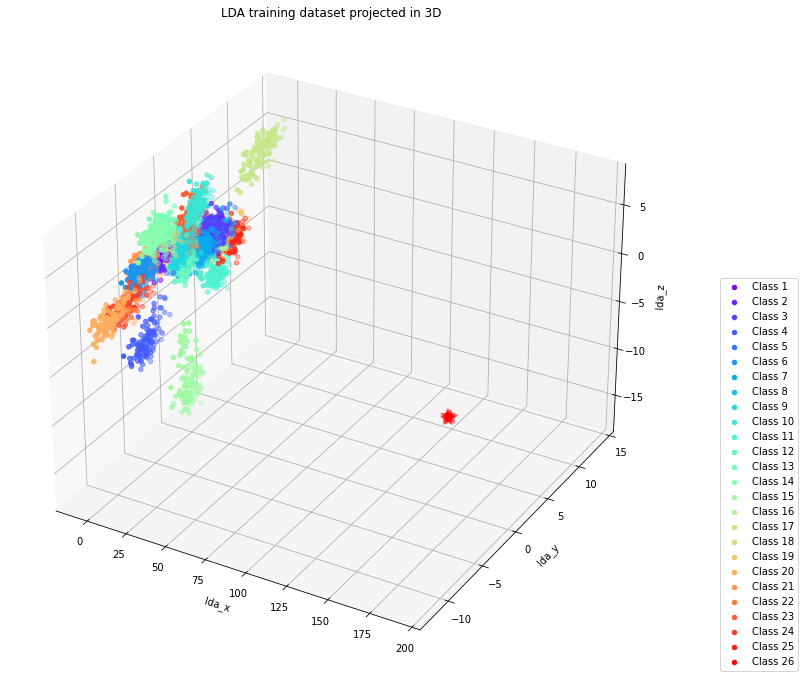

In [35]:
fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig)

y_unique = np.unique(select_train_label)
colors = cm.rainbow(np.linspace(0.0, 1.0, len(y_unique)))
for label, color in zip(y_unique, colors):
    X = trainset_lda_3d[trainset_lda_3d.label.isin ([label])]
    ax.scatter(X.lda_x, X.lda_y, X.lda_z, c = color[np.newaxis, :], label="Class %s" % label)

X_self_lda_3d = trainset_lda_3d[trainset_lda_3d.label.isin([26])]
plt.plot(X_self_lda_3d.lda_x, X_self_lda_3d.lda_y, X_self_lda_3d.lda_z, 'r*',alpha = 0.3 ,markersize=15)

ax.legend(loc = [1.1,0])
ax.set_xlabel('lda_x')
ax.set_ylabel('lda_y')
ax.set_zlabel('lda_z')
plt.title('LDA training dataset projected in 3D')

plt.show()

### 2.3 Classification

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
def LDA_Classfication_normalize(train_data,train_label, test_data, test_label, dimension):
    
    lda = make_pipeline(StandardScaler(),LinearDiscriminantAnalysis(n_components = dimension))
    
    train_data_lda = lda.fit(train_data,train_label).transform(train_data)
    
    
    clf = KNeighborsClassifier()
    clf.fit(train_data_lda,train_label)
    
    test_data_lda = lda.transform(test_data)
    ytest_pred = clf.predict(test_data_lda)
    acuracy = accuracy_score(test_label,ytest_pred)
    
    return acuracy

In [38]:
a1 = LDA_Classfication_normalize(train_set, train_label, test_pie_set, test_pie_label, 2)
a2 = LDA_Classfication_normalize(train_set, train_label, test_pie_set, test_pie_label, 3)
a3 = LDA_Classfication_normalize(train_set, train_label, test_pie_set, test_pie_label, 9)

a11 = LDA_Classfication_normalize(train_set, train_label, test_self_set, test_self_labels, 2)
a12 = LDA_Classfication_normalize(train_set, train_label, test_self_set, test_self_labels, 3)
a13 = LDA_Classfication_normalize(train_set, train_label, test_self_set, test_self_labels, 9)

In [39]:
print('The accuracy of LDA with 2 components plus KNN classification on the CMU PIE test images is:', a1) 
print('The accuracy of LDA with 3 components plus KNN classification on the CMU PIE test images is:', a2) 
print('The accuracy of LDA with 9 components plus KNN classification on the CMU PIE test images is:', a3) 
print('The accuracy of LDA with 2 components plus KNN classification on the SELFIE test images is:', a11) 
print('The accuracy of LDA with 3 components plus KNN classification on the SELFIE test images is:', a12) 
print('The accuracy of LDA with 9 components plus KNN classification on the SELFIE test images is:', a13) 

The accuracy of LDA with 2 components plus KNN classification on the CMU PIE test images is: 0.2384313725490196
The accuracy of LDA with 3 components plus KNN classification on the CMU PIE test images is: 0.44
The accuracy of LDA with 9 components plus KNN classification on the CMU PIE test images is: 0.9215686274509803
The accuracy of LDA with 2 components plus KNN classification on the SELFIE test images is: 0.0
The accuracy of LDA with 3 components plus KNN classification on the SELFIE test images is: 0.0
The accuracy of LDA with 9 components plus KNN classification on the SELFIE test images is: 0.0


In [40]:
test_set = np.concatenate((test_pie_set,test_self_set), axis = 0)
test_label  =  np.concatenate((test_pie_label,test_self_labels), axis = 0)

In [41]:
a111 = LDA_Classfication_normalize(train_set, train_label, test_set, test_label, 2)
a112 = LDA_Classfication_normalize(train_set, train_label, test_set, test_label, 3)
a113 = LDA_Classfication_normalize(train_set, train_label, test_set, test_label, 9)

In [42]:
print('The accuracy of LDA with 2 components plus KNN classification on all the test images is:', a111) 
print('The accuracy of LDA with 3 components plus KNN classification on all the test images is:', a112) 
print('The accuracy of LDA with 9 components plus KNN classification on all the test images is:', a113) 

The accuracy of LDA with 2 components plus KNN classification on all the test images is: 0.2378716744913928
The accuracy of LDA with 3 components plus KNN classification on all the test images is: 0.43896713615023475
The accuracy of LDA with 9 components plus KNN classification on all the test images is: 0.9194053208137715


In [78]:
import warnings
warnings.filterwarnings('ignore')
ax1 = LDA_Classfication_normalize(select_train_set, select_train_label, test_self_set, test_self_labels, 2)
ax2 = LDA_Classfication_normalize(select_train_set, select_train_label, test_self_set, test_self_labels, 3)
ax3 = LDA_Classfication_normalize(select_train_set, select_train_label, test_self_set, test_self_labels, 9)

In [79]:
print('The accuracy of LDA with 2 components plus KNN classification on the SELFIE test images is:', ax1) 
print('The accuracy of LDA with 3 components plus KNN classification on the SELFIE test images is:', ax2) 
print('The accuracy of LDA with 9 components plus KNN classification on the SELFIE test images is:', ax3)

The accuracy of LDA with 2 components plus KNN classification on the SELFIE test images is: 1.0
The accuracy of LDA with 3 components plus KNN classification on the SELFIE test images is: 1.0
The accuracy of LDA with 9 components plus KNN classification on the SELFIE test images is: 1.0


## 3. GMM

In [43]:
from sklearn.mixture import GaussianMixture

### 3.1  Use raw face images as training data

In [44]:
gm = GaussianMixture(n_components=3).fit(train_set)
gm_pred_labels = gm.predict(train_set)

In [45]:
pca = PCA(n_components=2)
data_pca = pca.fit(train_set).transform(train_set)

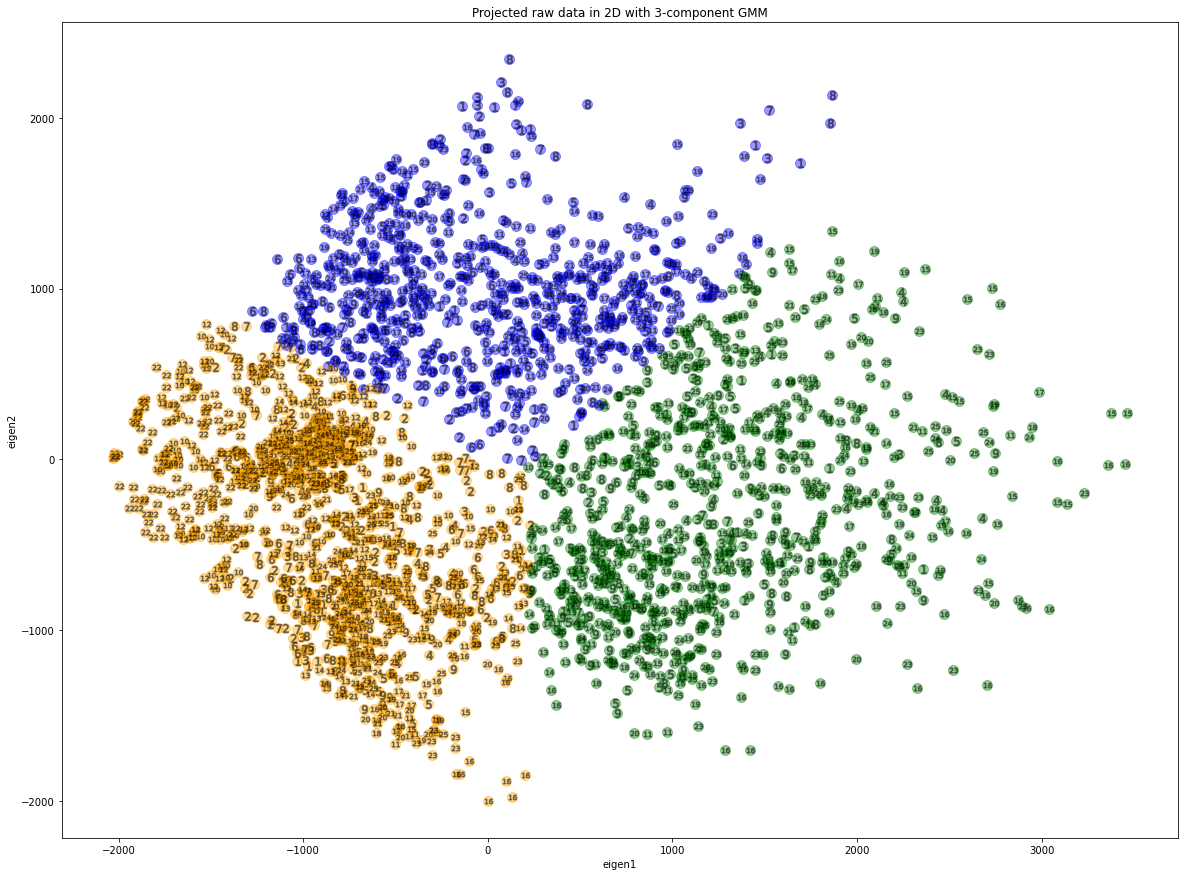

In [46]:
colors = {0: 'blue', 1: 'orange', 2: 'green'}  # set the color of different GMM components.
fig = plt.figure(figsize=(20,15))
for i in range(data_pca.shape[0]):
    plt.scatter(data_pca[i,0],data_pca[i,1],  c = colors[gm_pred_labels[i]],
                 s=100, alpha=0.4,label = gm_pred_labels[i])
    plt.scatter(data_pca[i,0],data_pca[i,1],c = 'k', alpha=0.4, marker="$"+str(train_label[i])+"$", s = 70 )
    # mark the data with their corresponding classes.
plt.xlabel('eigen1')
plt.ylabel('eigen2')
plt.title('Projected raw data in 2D with 3-component GMM')

plt.show()

### 3.2  Use face vectors after PCA pre-processing with dimensionality of 80	

In [47]:
pca_80 = PCA(n_components = 80)
trainset_pca_80 = pca_80.fit(train_set).transform(train_set)
gm80 = GaussianMixture(n_components=3).fit(trainset_pca_80)
gm80_pred_labels = gm80.predict(trainset_pca_80)

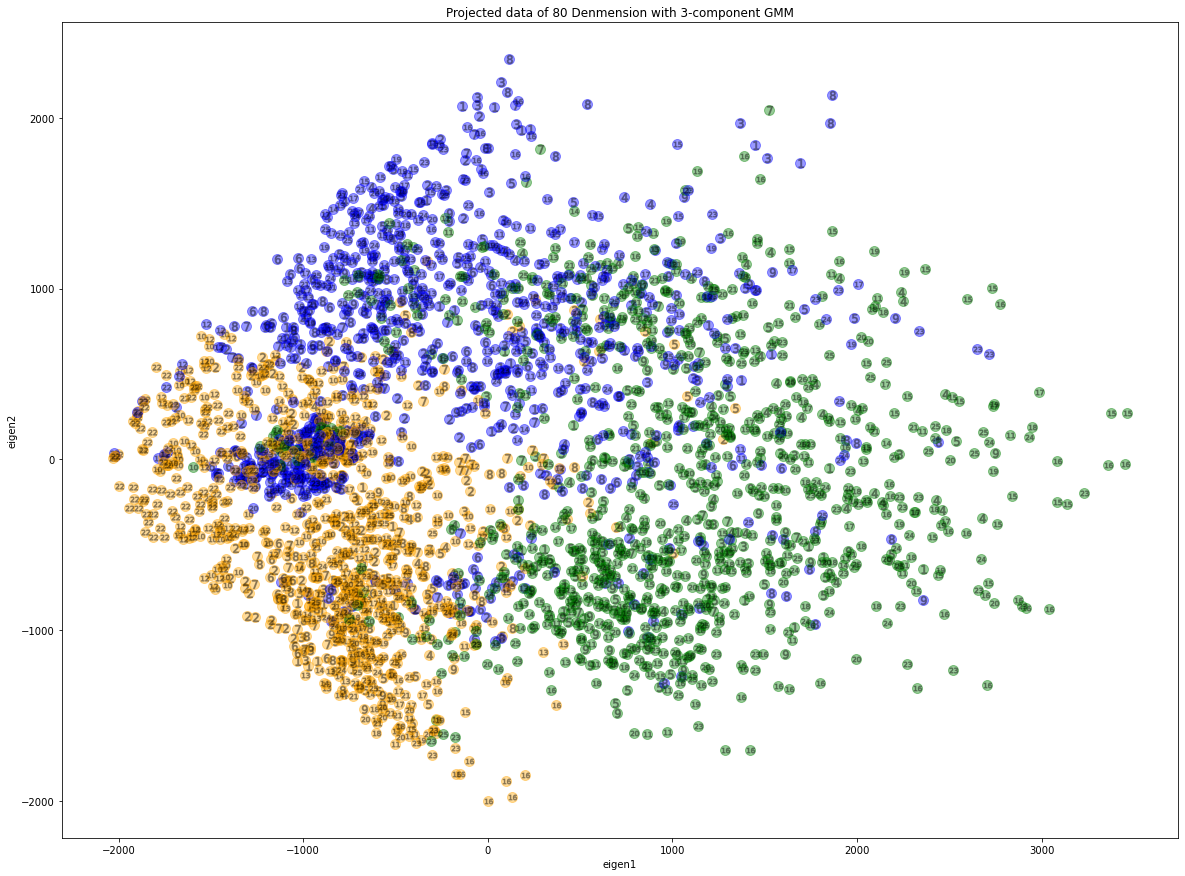

In [48]:
colors = {0: 'blue', 1: 'orange', 2: 'green'}
fig = plt.figure(figsize=(20,15))
# visualise first 2 PCs with GMM labels 
for i in range(trainset_pca_80.shape[0]):
    plt.scatter(trainset_pca_80[i,0],trainset_pca_80[i,1],  c = colors[gm80_pred_labels[i]],
                 s=100, alpha=0.4,label = gm80_pred_labels[i])
    plt.scatter(trainset_pca_80[i,0],trainset_pca_80[i,1],c = 'k', alpha=0.3, 
                marker="$"+str(train_label[i])+"$", s=70 )

plt.xlabel('eigen1')
plt.ylabel('eigen2')
plt.title('Projected data of 80 Denmension with 3-component GMM')

plt.show()

### 3.3 Use face vectors after PCA pre-processing with dimensionality of 200

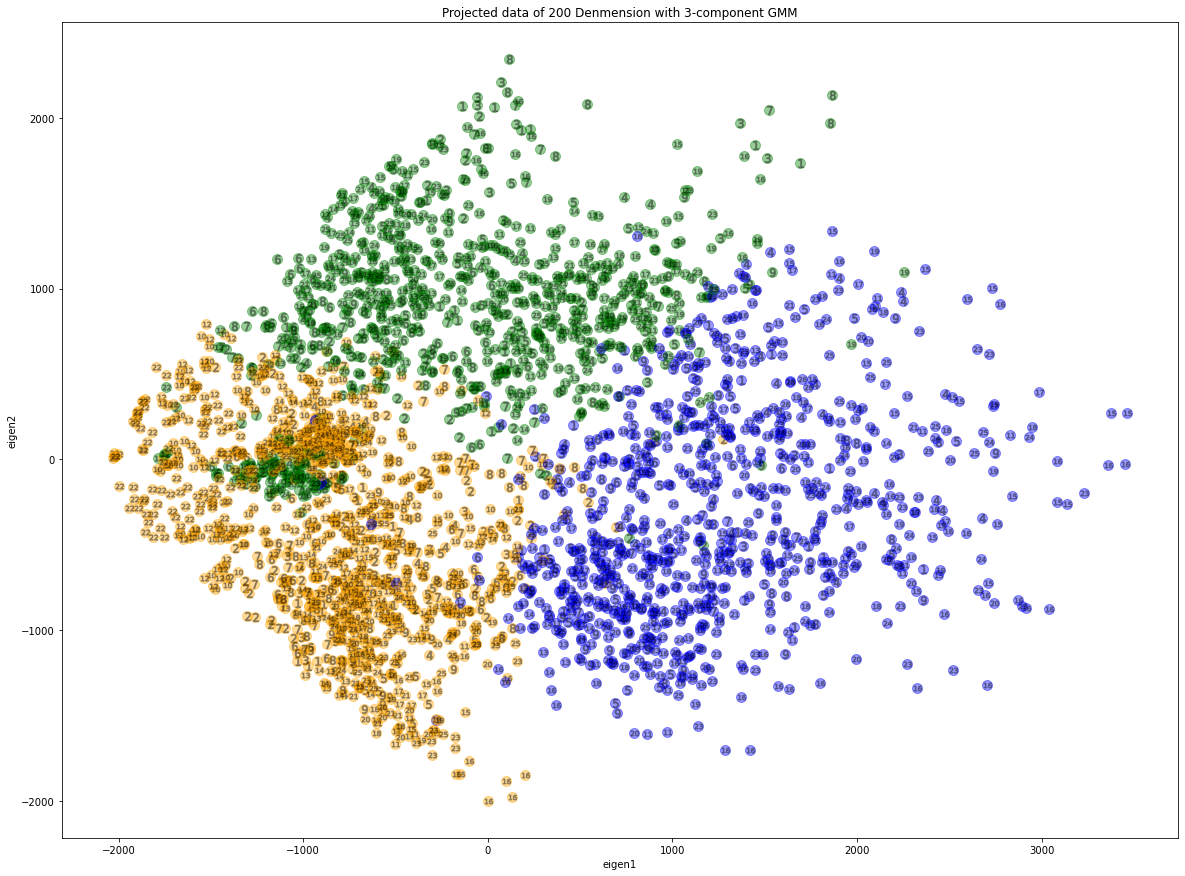

In [49]:
pca_200 = PCA(n_components = 200)
trainset_pca_200 = pca_200.fit(train_set).transform(train_set)
gm200 = GaussianMixture(n_components=3).fit(trainset_pca_200)
gm200_pred_labels = gm200.predict(trainset_pca_200)

colors = {0: 'blue', 1: 'orange', 2: 'green'}
fig = plt.figure(figsize=(20,15))
# visualise first 2 PCs with GMM labels 
for i in range(trainset_pca_200.shape[0]):
    plt.scatter(trainset_pca_200[i,0],trainset_pca_80[i,1],  c = colors[gm200_pred_labels[i]],
                 s=100, alpha=0.4,label = gm200_pred_labels[i])
    plt.scatter(trainset_pca_200[i,0],trainset_pca_200[i,1],c = 'k', alpha=0.3, marker="$"+str(train_label[i])+"$", s=70 )

plt.xlabel('eigen1')
plt.ylabel('eigen2')
plt.title('Projected data of 200 Denmension with 3-component GMM')

plt.show()


## 4.SVM

In [50]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### 4.1 SVM Model 

In [51]:
def SVM_acc(xtrain,ytrain,xtest,ytest,d):
    # d is the dimension of PCA dataset, whcih can be 'raw', 200 and 80. 
    
    c_value = [1e-2,1e-1,1.0] # set the penlty parameters
    for c in c_value:
        
        # set 'dual= True' for train set features > examples
        clf = make_pipeline(StandardScaler(),LinearSVC(C = c, dual = False)) # iter is 1000 as default
        clf.fit(xtrain, ytrain)                                              # if there is a warning'failed to converge'
        y_preds = clf.predict(xtest)                                         # you can change the iter parameters 
        res = accuracy_score(ytest, y_preds)  # calculate the accuracy 

        if d == 'raw':
            print("accuracy on raw images with penalty parameter C={}: {}".format(c, res))
        else:
            print("accuracy using PCA {}-component feature with penalty parameter C={}: {}".format(d, c, res))


### 4.2 Training and Testing Accuracy

In [52]:
SVM_acc(train_set,train_label,test_set,test_label,'raw')

accuracy on raw images with penalty parameter C=0.01: 0.9820031298904538
accuracy on raw images with penalty parameter C=0.1: 0.9804381846635368
accuracy on raw images with penalty parameter C=1.0: 0.9796557120500783


In [53]:
testset_pca_80 = pca_80.transform(test_set)
SVM_acc(trainset_pca_80,train_label,testset_pca_80,test_label,80)

accuracy using PCA 80-component feature with penalty parameter C=0.01: 0.960093896713615
accuracy using PCA 80-component feature with penalty parameter C=0.1: 0.9702660406885759
accuracy using PCA 80-component feature with penalty parameter C=1.0: 0.9663536776212832


In [54]:
testset_pca_200 = pca_200.transform(test_set)
SVM_acc(trainset_pca_200,train_label,testset_pca_200,test_label,200)

accuracy using PCA 200-component feature with penalty parameter C=0.01: 0.9773082942097027
accuracy using PCA 200-component feature with penalty parameter C=0.1: 0.9804381846635368
accuracy using PCA 200-component feature with penalty parameter C=1.0: 0.9788732394366197


## 5.CNN

In [55]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers
import keras

In [56]:
# Creating a Sequential mode
model = Sequential()
# 1st conv layer with a kernel size of 5
model.add(Conv2D(filters = 20, kernel_size = (5,5) ,activation='relu',
                 input_shape=(32, 32, 1)))
# 1st pooling layer with a kernel size of 2 and stride of 2
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
# 2nd conv layer
model.add(Conv2D(filters = 50, kernel_size = (5, 5), activation='relu'))
# 2nd pooling layer with a kernel size of 2 and stride of 2
model.add(MaxPooling2D(pool_size=(2 ,2), strides = 2))
model.add(Flatten())

#  FC layer with 500 nodes
model.add(Dense(500, activation='relu'))
# output layer with 26 nodes/classes
model.add(Dense(26, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 50)        25050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 50)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1250)              0         
                                                                 
 dense (Dense)               (None, 500)               6

In [57]:
import tensorflow as tf
from keras.utils import np_utils

In [58]:
y_train = np_utils.to_categorical(train_label) # try and one-hot the train label
y_train  # there is 27 columns in y_train, but the actural columns is just 26(25 PIE and 1 selfie)

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [59]:
X_train = train_set.reshape(train_set.shape[0], 32, 32 ,1)
X_train.shape

(2982, 32, 32, 1)

In [67]:
model.compile(loss = 'categorical_crossentropy',
          optimizer = 'adadelta',
          metrics = ['accuracy'])


X_train = train_set.reshape(train_set.shape[0], 32, 32 ,1)
X_test = test_set.reshape(test_set.shape[0], 32, 32, 1)
y_train = [data-1 for data in train_label]
Y_train = np_utils.to_categorical(y_train)
y_test = [data-1 for data in test_label]
Y_test = np_utils.to_categorical(y_test)


seed = 3
np.random.seed(seed)


history = model.fit(X_train, Y_train, batch_size = 4, epochs = 24, 
                    verbose=1, validation_data = (X_test, Y_test))

score = model.evaluate(X_test, Y_test)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/24
746/746 [==============================] - 6s 8ms/step - loss: 0.7443 - accuracy: 0.8290 - val_loss: 0.9366 - val_accuracy: 0.7684
Epoch 2/24
746/746 [==============================] - 6s 7ms/step - loss: 0.7277 - accuracy: 0.8313 - val_loss: 0.9181 - val_accuracy: 0.7754
Epoch 3/24
746/746 [==============================] - 5s 7ms/step - loss: 0.7108 - accuracy: 0.8387 - val_loss: 0.9019 - val_accuracy: 0.7809
Epoch 4/24
746/746 [==============================] - 5s 7ms/step - loss: 0.6958 - accuracy: 0.8441 - val_loss: 0.8912 - val_accuracy: 0.7833
Epoch 5/24
746/746 [==============================] - 5s 7ms/step - loss: 0.6818 - accuracy: 0.8498 - val_loss: 0.8728 - val_accuracy: 0.7872
Epoch 6/24
746/746 [==============================] - 5s 7ms/step - loss: 0.6663 - accuracy: 0.8521 - val_loss: 0.8567 - val_accuracy: 0.7887
Epoch 7/24
746/746 [==============================] - 5s 7ms/step - loss: 0.6513 - accuracy: 0.8605 - val_loss: 0.8497 - val_accuracy: 0.7973
Epoch 

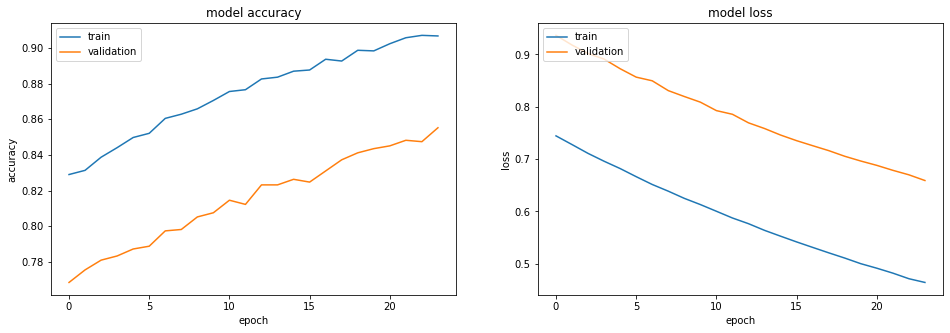

In [68]:
# show the accuracy and lose history
fig = plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()